In [ ]:
print("Hello; World")

Hello; World


In [ ]:
def power_law(x, a, p):
    # After the declaration, use tabs to define the function internals
    # We use * for multiplication, and ** for exponentiation
    my_result = a * x**p
    return my_result


a_test = 4
p_test = 2
print(power_law(10, a=a_test, p=p_test), power_law(2, a_test, p_test))

400 16


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
x_sparse = np.array([0, 2, 5, 7, 10])
x_dense = np.linspace(0, 10, 100)

In [7]:
y_sparse = power_law(x_sparse, a_test, p_test)
y_dense = power_law(x_dense, a_test, p_test)
print(y_sparse.shape)
print(y_dense.shape)

(5,)
(100,)


Text(4, 300, 'This is a test')

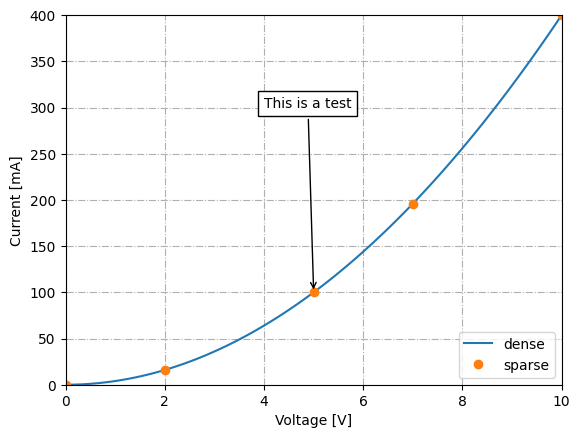

In [8]:
plt.plot(x_dense, y_dense, label="dense")
plt.plot(x_sparse, y_sparse, "o", label="sparse")
plt.legend(loc="lower right")
plt.xlim(left=0, right=10)
plt.ylim(bottom=0, top=400)
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")
plt.annotate(
    "This is a test",
    xy=(5, 100),
    xytext=(4, 300),
    bbox={"facecolor": "white"},
    arrowprops={"arrowstyle": "->"},
)

In [9]:
import pandas as pd

df_current = pd.read_csv("../ezfit/data/current_data.csv")
df_voltage = pd.read_csv("../ezfit/data/voltage_data.csv")

In [10]:
display(df_current.head())
display(df_voltage.head())

,time,current
0,0.2,0.980067
1,0.7,0.764842
2,1.2,0.362358
3,1.7,-0.128844
4,2.2,-0.588501


,time,voltage
0,0.0,0.000000
1,0.5,0.479426
2,1.0,0.841471
3,1.5,0.997495
4,2.0,0.909297


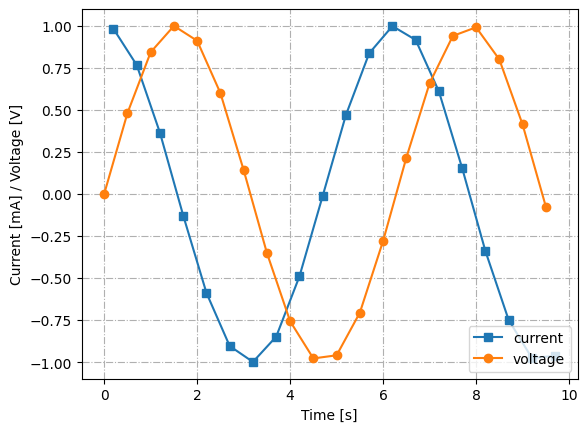

In [11]:
ax = df_current.plot(x="time", y="current", style="s-")
df_voltage.plot(x="time", y="voltage", style=["o-"], ax=ax)
plt.xlabel("Time [s]")
plt.ylabel("Current [mA] / Voltage [V]")
plt.legend(loc="lower right")
plt.grid(True, ls="-.")

In [12]:
# To select a column use df[“column_name”]
common_t = df_voltage["time"]  # this is like a pointer if you are familiar
# new_data = np.interp(new_domain, old_domain, old_data)
common_current = np.interp(common_t, df_current["time"], df_current["current"])
df_current_interp = pd.DataFrame(
    {  # use new lines to keep things readable
        "time": common_t,  # if you are wrapped in () you
        "current": common_current,  # are good to make new lines!
    }
)

In [13]:
df_merged = pd.merge(df_voltage, df_current_interp, on="time")
df_merged["power"] = df_merged["current"] * df_merged["voltage"]

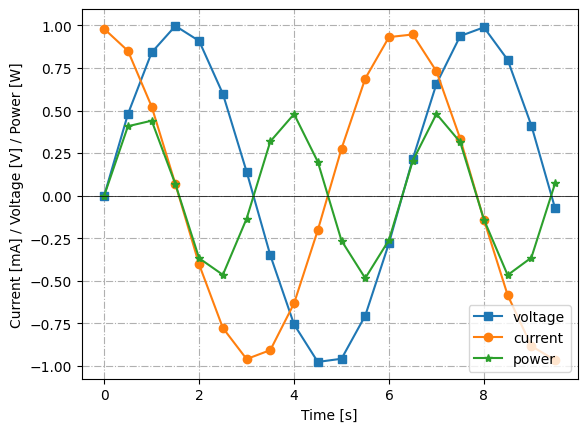

In [14]:
ax = df_merged.plot(x="time", style=["s-", "o-", "*-"])
ax.axhline(y=0, color="k", ls="-", lw=0.5)
plt.xlabel("Time [s]")
plt.grid(True, ls="-.")
plt.ylabel("Current [mA] / Voltage [V] / Power [W]")
plt.legend(loc="lower right")

In [15]:
df_merged.to_csv("../ezfit/data/merged_data.csv", index=False)

In [67]:
df_data = pd.read_csv("../data/lab1/powerlaw.csv")

<Axes: xlabel='x'>

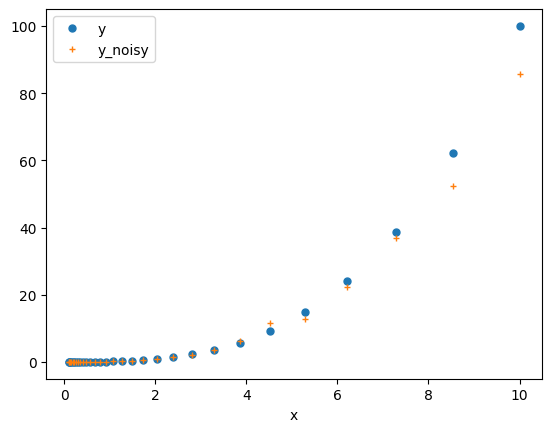

In [68]:
df_data.plot(x="x", y=["y", "y_noisy"], style=["o", "+"], ms=5)

Text(0, 0.5, 'Current [mA]')

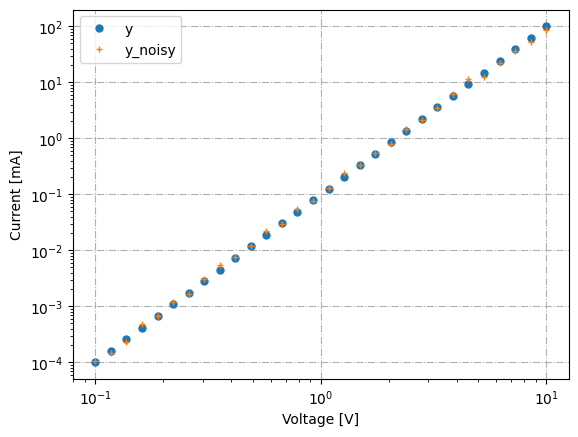

In [69]:
df_data.plot(x="x", y=["y", "y_noisy"], style=["o", "+"], ms=5, loglog=True)
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")

Text(0.5, 0, 'Log Voltage [log(V)]')

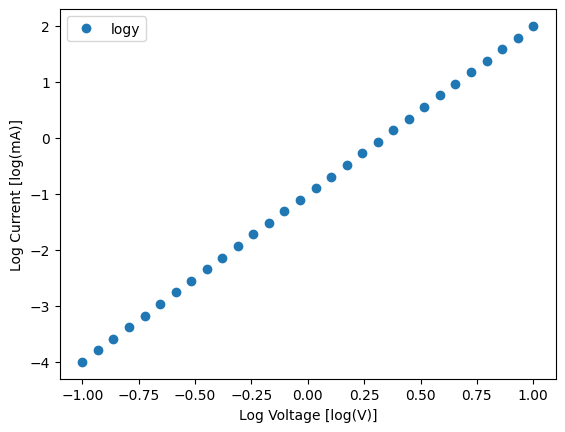

In [93]:
df_data["logx"] = np.log10(df_data["x"])
df_data["logy"] = np.log10(df_data["y"])
df_data.plot(x="logx", y="logy", style="o")
plt.ylabel("Log Current [log(mA)]")
plt.xlabel("Log Voltage [log(V)]")

Parameter,Value,Error
a,0.136022,±0.0120052
p,2.7959,±0.0401477
,a,p
a,0.000144126,-0.000480486
p,-0.000480486,0.00161184
,a,p
a,1,-0.996896
p,-0.996896,1


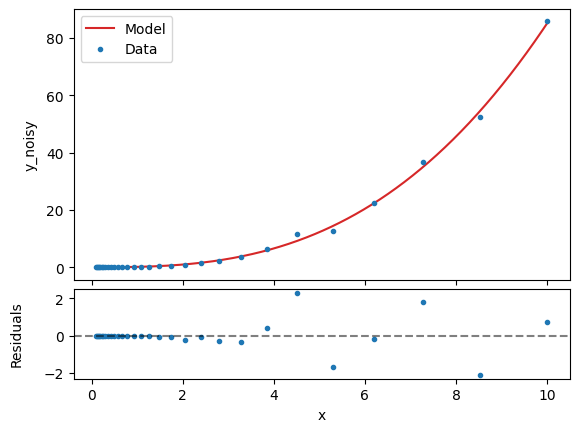

In [100]:
fit_results, *_ = df_data.fit(
    power_law,
    x="x",
    y="y_noisy",
)
display(fit_results)

In [107]:
(fit_results.params["a"].err / fit_results.params["a"].value) * 100

np.float64(8.82597333816324)

In [106]:
(fit_results.params["p"].err / fit_results.params["p"].value) * 100

np.float64(1.435947274848086)

In [110]:
(fit_results.params["p"].value - 3) / fit_results.params["p"].err

np.float64(-5.083690624114315)

In [111]:
print(fit_results)

power_law()

  Parameters:
    Parameter    Value          Error
    ----------------------------------------
    a                0.136022   ±0.0120052
    p                  2.7959   ±0.0401477

  Statistics:
    𝜒²=16.6069, r𝜒²=0.593104, R²=0.998407, RMSE=0.744019, BIC=-10.939, AIC=-13.7414

  Covariance Matrix:
                  a           p
    ---------------------------
    a   0.000144126-0.000480486
    p  -0.000480486  0.00161184

  Correlation Matrix:
                  a           p
    ---------------------------
    a             1   -0.996896
    p     -0.996896           1


Text(3, 80, 'p: 2.8 +/- 0.04\na: 0.14 +/- 0.01')

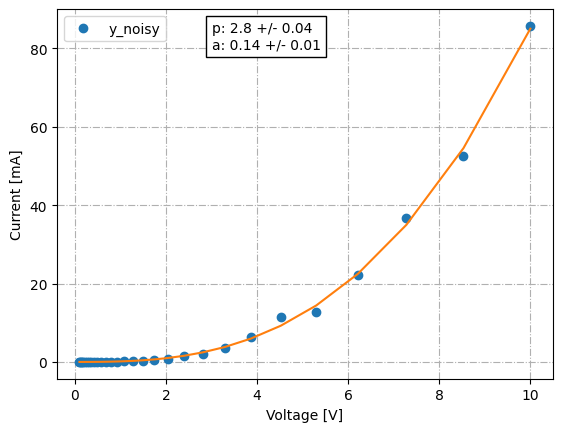

In [ ]:
df_data.plot(x="x", y="y_noisy", style="o")
plt.plot(df_data["x"], fit_results(df_data["x"]))
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")
p = fit_results.params["p"]
a = fit_results.params["a"]
plt.annotate(
    f"p: {p.value:.3g} +/- {p.err:.1g}\na: {a.value:.2g} +/- {a.err:.1g}",
    (3, 80),
    bbox={"facecolor": "white"},
)

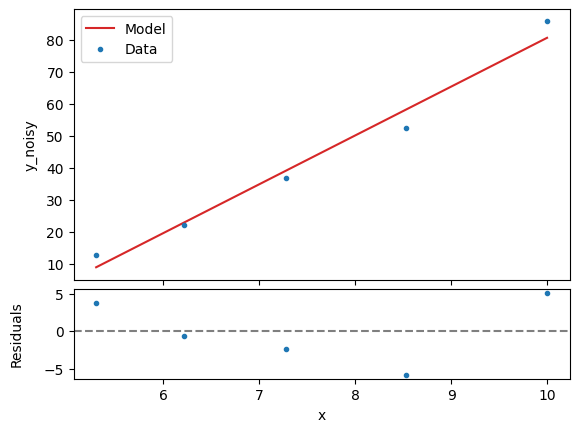

In [113]:
def line(x, m, b):
    return m * x + b


line_results, *_ = df_data.query("x>5").fit(
    line,
    x="x",
    y="y_noisy",
)

Text(0.5, 200, 'm: 15.23\nb: -71.68\n')

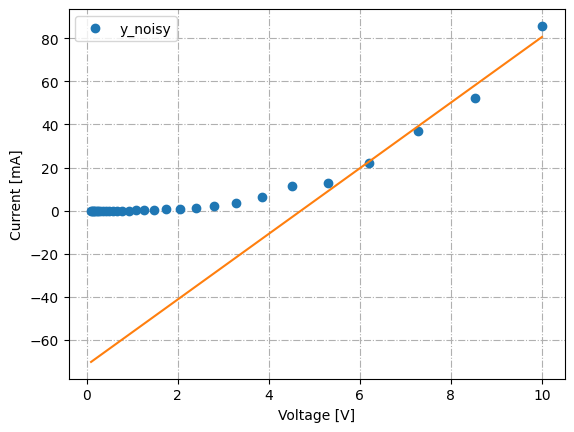

In [114]:
df_data.plot(x="x", y="y_noisy", style="o")
plt.plot(df_data["x"], line_results(df_data["x"]))
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")
s = "".join([f"{n}: {p.value:.2f}\n" for n, p in line_results.params.items()])
plt.annotate(s, (0.5, 200))

Parameter,Value,Error
a,0.136022,±0.0120052
p,2.7959,±0.0401477
,a,p
a,0.000144126,-0.000480486
p,-0.000480486,0.00161184
,a,p
a,1,-0.996896
p,-0.996896,1


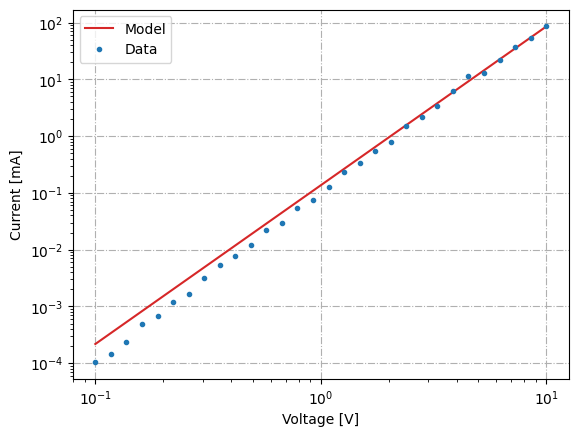

In [117]:
fit_results2, *ax = df_data.fit(power_law, x="x", y="y_noisy", residuals="none")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")
plt.grid(True, ls="-.")
fit_results2

Text(0, 0.5, 'Current [mA]')

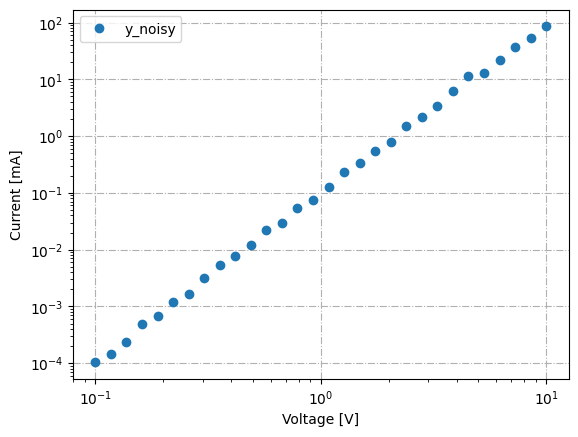

In [90]:
df_data.plot(x="x", y="y_noisy", style="o", loglog=True)

plt.grid(True, ls="-.")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")

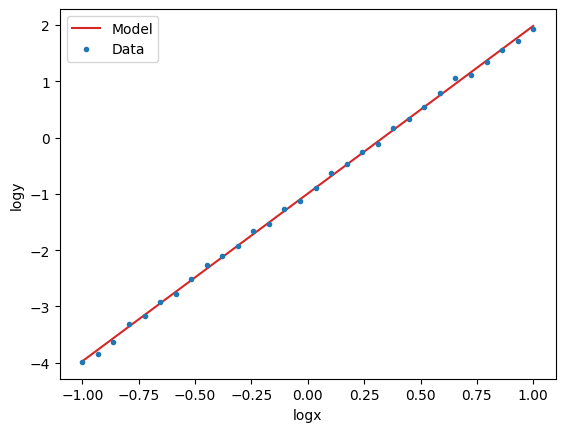

In [91]:
df_data["logy"] = np.log10(df_data["y_noisy"])
fit_results_linear, *_ = df_data.fit(line, x="logx", y="logy", residuals="none")

In [92]:
fit_results_linear

Parameter,Value,Error
m,2.97855,±0.0137166
b,-0.994335,±0.00818782
,m,b
m,0.000188146,-7.9848e-14
b,-7.9848e-14,6.70405e-05
,m,b
m,1,-7.10965e-10
b,-7.10965e-10,1


Text(0, 0.5, 'Current [mA]')

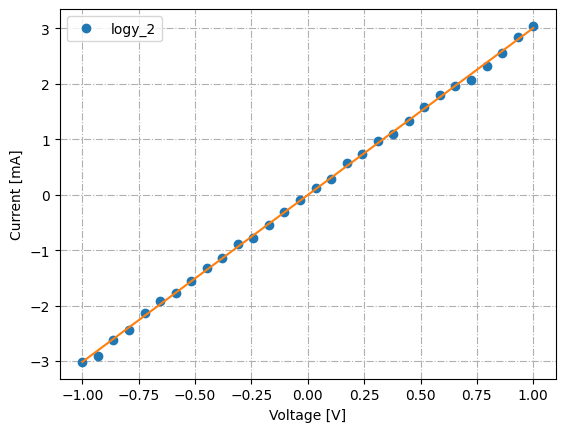

In [34]:
ax = df_data.plot(x="logx", y="logy_2", style="o")
fit_results_linear.plot(ax=ax)
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")

Text(0, 0.5, 'Current [mA]')

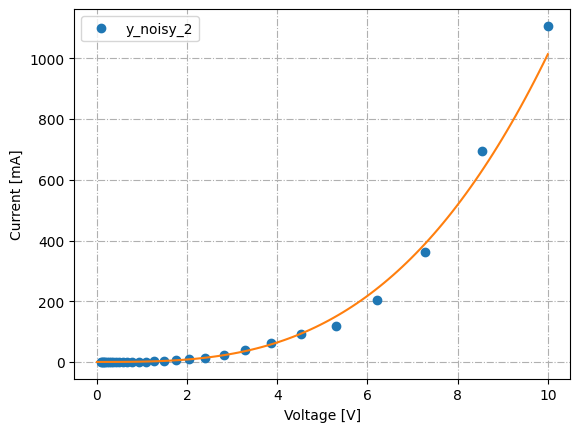

In [35]:
p = fit_results_linear.params
power = p["m"].value
A = 10 ** p["b"].value

ax = df_data.plot(x="x", y="y_noisy_2", style="o")
x_new = np.linspace(0, 10, 100)
plt.plot(x_new, power_law(x_new, A, power))
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")